# King County Housing Data

### Importing relavent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols

### Import Data

In [2]:
data = pd.read_csv('kc_house_data.csv')

### EDA

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21597, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Waterfront and View

In [8]:
data.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
data.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [10]:
# fill NaN values in waterfront columns with 0
values = {'view':0, 'waterfront':0}
data.fillna(value=values, inplace=True)
data['waterfront'].isna().sum()

0

Let's map out the waterfront properties

In [11]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [12]:
waterfront = data[(data['waterfront'] == "YES")]

waterfront_map = folium.Map(location=[waterfront.lat.mean(), waterfront.long.mean()],
                           zoom_start=11,
                           tiles='openstreetmap')
for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    price = waterfront.price[i]
    sqft_living = waterfront.sqft_living[i]
    marker=folium.Marker([lat, long]).add_to(waterfront_map)
    #add popup text with price and sqft_living for each property to see property values on waterfront
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)
    
waterfront_map

In [13]:
len(waterfront)

146

### View

Lets see if there's overlap for waterfront and view

In [14]:
data.view.unique()

array(['NONE', 0, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [15]:
pd.options.mode.chained_assignment = None  # default='warn'
#Convert string values to numeric values
data.view[data.view == 'NONE'] = 0
data.view[data.view == 'AVERAGE'] = 1
data.view[data.view == 'FAIR'] = 2
data.view[data.view == 'GOOD'] = 3
data.view[data.view == 'EXCELLENT'] = 4
data['view'].unique()

array([0, 3, 4, 1, 2], dtype=object)

In [16]:
view = data[(data['view'] >= 2)]
view_map = folium.Map(location=[view.lat.mean(), view.long.mean()],
                           zoom_start=11,
                           tiles='openstreetmap')
for i in view.index:
    lat = view.lat[i]
    long = view.long[i]
    price = view.price[i]
    sqft_living = view.sqft_living[i]
    marker=folium.Marker([lat, long]).add_to(view_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(view_map)
    
view_map

In [17]:
len(view)

1155

It looks like fair and above views are also on the waterfront. Let's see if these have any correlation to price by using a heatmap.
I want to create a heatmap overlayed on the property parcel map of King county so I'll have to create bins that store the homes by price value groups.

In [18]:
#Make a new column for 'price' in duplicate df with 7 bins
df = data

df['price_bins'] = df.price.map(lambda x: 1 if x >= 1 and x <= 250000
                               else (2 if x > 250000 and x <= 500000
                                    else (3 if x > 500000 and x <= 750000
                                         else (4 if x > 750000 and x <= 1000000
                                              else (5 if x > 1000000 and x <= 2000000
                                                   else (6 if x > 2000000 and x <= 4000000
                                                        else 7))))))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,3
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3


In [19]:
# houses by price

lat1 = df.loc[df['price_bins'] == 1].lat
long1 = df.loc[df['price_bins'] == 1].long

lat2 = df.loc[df['price_bins'] == 2].lat
lat2 = df.loc[df['price_bins'] == 2].long

lat3 = df.loc[df['price_bins'] == 3].lat
lat3 = df.loc[df['price_bins'] == 3].long

lat4 = df.loc[df['price_bins'] == 4].lat
lat4 = df.loc[df['price_bins'] == 4].long

lat5 = df.loc[df['price_bins'] == 5].lat
lat5 = df.loc[df['price_bins'] == 5].long

lat6 = df.loc[df['price_bins'] == 6].lat
lat6 = df.loc[df['price_bins'] == 6].long

lat7 = df.loc[df['price_bins'] == 7].lat
lat7 = df.loc[df['price_bins'] == 7].long

In [20]:
# import necessary packages

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# create basemap

basemap = gpd.read_file('Parcels_for_King_County_with_Address_with_Property_Information___parcel_address_area.shp')

In [21]:
crs = {'init' : 'epsg:4326'}

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# using lat and long for geometry
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:3]

# creating a dataframe with a new column for geometry points
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

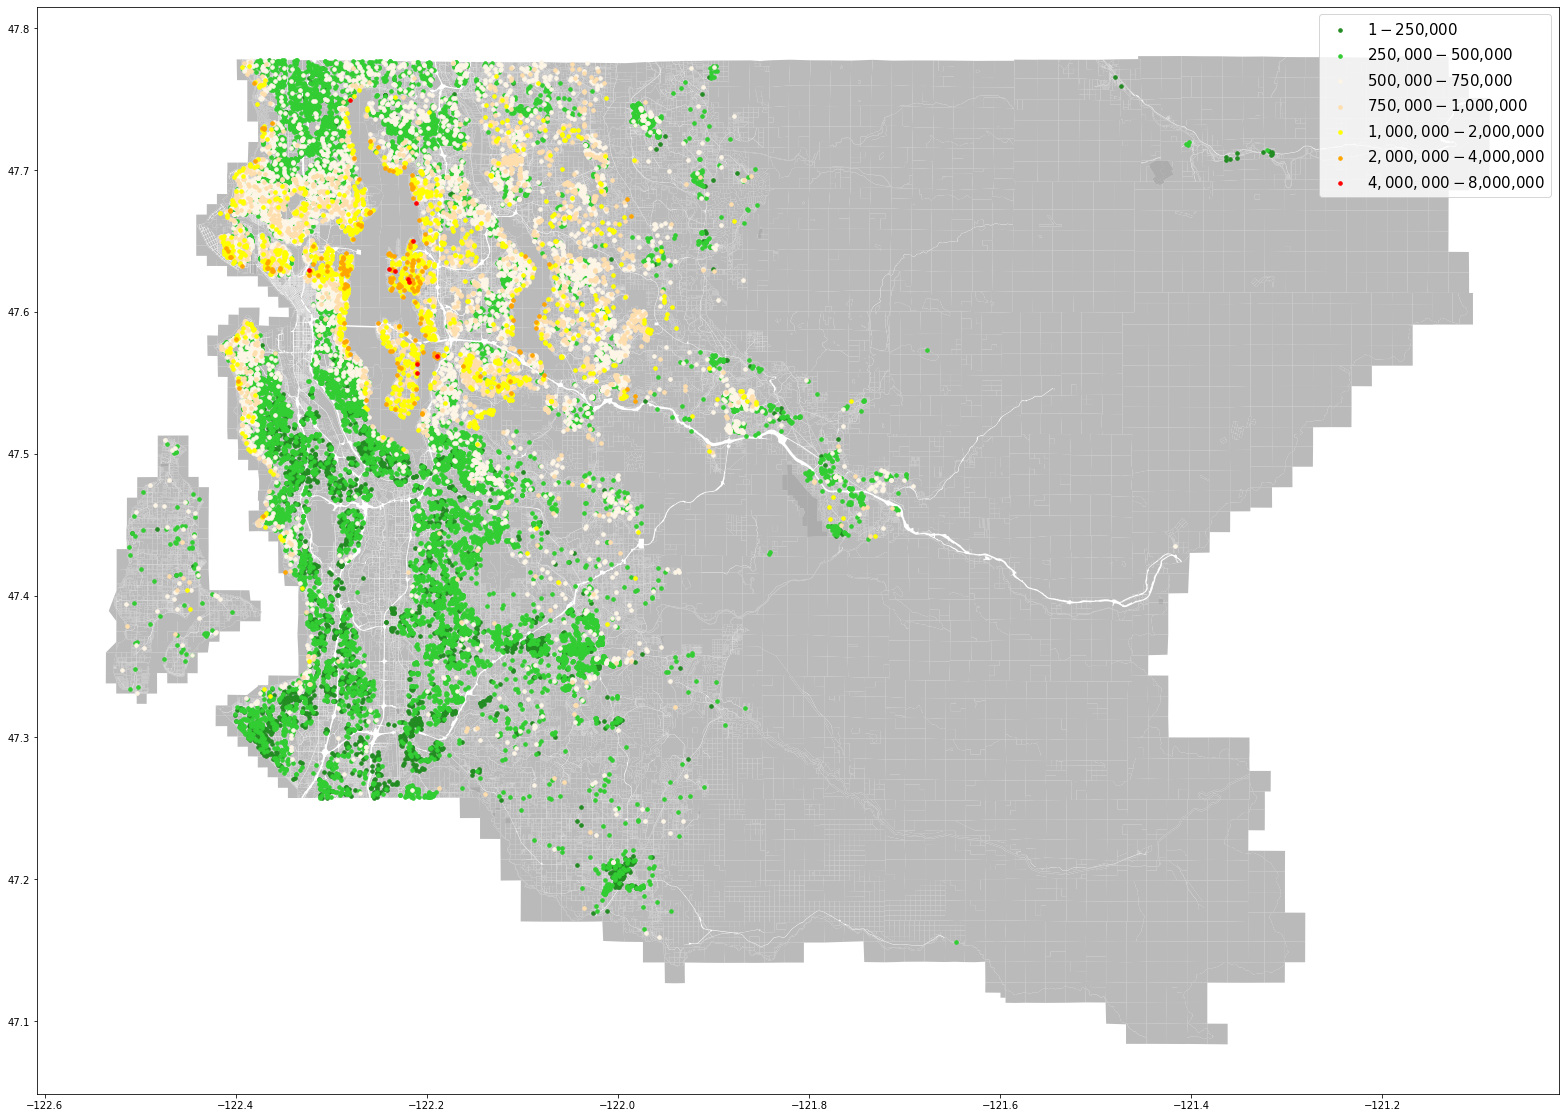

In [22]:
# plotting basemap with 7 price ranges

fig, ax = plt.subplots(figsize=(40,20))
basemap.plot(ax = ax, alpha = 0.8, color = 'darkgrey')

geo_df[geo_df['price_bins'] == 1].plot(ax=ax, markersize = 50, color = 'forestgreen', marker = '.', label = '$1 - $250,000')
geo_df[geo_df['price_bins'] == 2].plot(ax=ax, markersize = 50, color = 'limegreen', marker = '.', label = '$250,000 - $500,000')
geo_df[geo_df['price_bins'] == 3].plot(ax=ax, markersize = 50, color = 'oldlace', marker = '.', label = '$500,000 - $750,000')
geo_df[geo_df['price_bins'] == 4].plot(ax=ax, markersize = 50, color = 'navajowhite', marker = '.', label = '$750,000 - $1,000,000')
geo_df[geo_df['price_bins'] == 5].plot(ax=ax, markersize = 50, color = 'yellow', marker = '.', label = '$1,000,000 - $2,000,000')
geo_df[geo_df['price_bins'] == 6].plot(ax=ax, markersize = 50, color = 'orange', marker = '.', label = '$2,000,000 - $4,000,000')
geo_df[geo_df['price_bins'] == 7].plot(ax=ax, markersize = 50, color = 'red', marker = '.', label = '$4,000,000 - $8,000,000')

plt.legend(prop={'size':15})

Yes. The better views and waterfront properties have a higher price value. We'll see how much it correlates to price later.

Both 'view' and 'waterfront' are categorical values.

In [23]:
#convert string categorical values for waterfront to integers
data.waterfront[data.waterfront == 'NO'] = 0
data.waterfront[data.waterfront == 'YES'] = 1
data['waterfront'].describe()

count     21597
unique        2
top           0
freq      21451
Name: waterfront, dtype: int64

In [24]:
data['waterfront'].isna().sum()

0

In [25]:
data['waterfront'].unique()

array([0, 1], dtype=object)

In [26]:
data['waterfront'] = data['waterfront'].astype(str).astype(int)

In [27]:
data['waterfront'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


*categorical

### yr_built and yr_renovated

In [28]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [29]:
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [30]:
#df of yr_built and yr_renovated columns
years = data.loc[:,['yr_built', 'yr_renovated']]
years

,yr_built,yr_renovated
0,1955,0.0
1,1951,1991.0
2,1933,NaN
3,1965,0.0
4,1987,0.0
...,...,...
21592,2009,0.0
21593,2014,0.0
21594,2009,0.0
21595,2004,0.0


In [31]:
#df with only NaN values from years df
yrs_NaN = years.isnull()

yrRow_has_NaN = yrs_NaN.any(axis=1)

yrRows_with_NaN = years[yrRow_has_NaN]


print(yrRows_with_NaN)

       yr_built  yr_renovated
2          1933           NaN
12         1927           NaN
23         1985           NaN
26         1915           NaN
28         1948           NaN
...         ...           ...
21576      2008           NaN
21577      2006           NaN
21579      2006           NaN
21581      2007           NaN
21583      2003           NaN

[3842 rows x 2 columns]


In [32]:
date = data['date'].str.split('/', expand=True)
data['month_sold'] = date[0].astype('float64')
data['year_sold'] = date[2].astype('float64')

#Drop original date column
data.drop(columns=['date'], axis = 1, inplace=True)

In [33]:
data['age'] = 2015 - data.yr_built
data = data.drop(columns = ['yr_built'], axis =1)

In [34]:
#fill missing values
data.yr_renovated.fillna(0.0, inplace = True)

#create renovated column
data['renovated'] = data.year_sold - data.yr_renovated

#replace any values less than 10 with 1, and any values over 10 with 0
renovated = data.renovated.values
age = data.age.values
values = np.where(renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)

#Drop yr_renovated column
data.drop(columns = ['yr_renovated'], axis = 1, inplace =True)

### Condition

In [35]:
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [36]:
data.condition[data.condition == 'Poor'] = 1
data.condition[data.condition == 'Fair'] = 2
data.condition[data.condition == 'Average'] = 3
data.condition[data.condition == 'Good'] = 4
data.condition[data.condition == 'Very Good'] = 5
data['condition'].unique()

array([3, 5, 4, 1, 2], dtype=object)

In [37]:
data['condition'] = data['condition'].astype(str).astype(int)
data['condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: condition
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


*categorical

### sqft_basement

In [38]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [39]:
data.sqft_basement[data.sqft_basement == '?'] = 0

In [40]:
data['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype 
--------------  ----- 
21597 non-null  object
dtypes: object(1)
memory usage: 168.9+ KB


In [41]:
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype  
--------------  -----  
21597 non-null  float64
dtypes: float64(1)
memory usage: 168.9 KB


In [42]:
data['sqft_basement'] = data['sqft_basement'].astype(int)
data['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


In [43]:
data['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  710,  840,  380,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960,  280,  870, 1100,  460,
       1400,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,  350,
        935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,  340,
        470,  370,  140, 1760,  130,  520,  890, 1110,  150, 1720,  810,
        190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,  310,  930,
       1390,  610, 1830, 1300,  510, 1330, 1590,  920, 1320, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [44]:
# Create a boolean column for whether a property has a basement
data['has_bsmnt'] = np.where((data['sqft_basement'] > 0), 1,0)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,price_bins,geometry,month_sold,year_sold,age,renovated,has_bsmnt
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,-122.257,1340,5650,1,POINT (-122.25700 47.51120),10.0,2014.0,60,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,-122.319,1690,7639,3,POINT (-122.31900 47.72100),12.0,2014.0,64,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,-122.233,2720,8062,1,POINT (-122.23300 47.73790),2.0,2015.0,82,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,-122.393,1360,5000,3,POINT (-122.39300 47.52080),12.0,2014.0,50,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,-122.045,1800,7503,3,POINT (-122.04500 47.61680),2.0,2015.0,28,0,0


has_bsmnt *categorical

### Bathrooms

In [45]:
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

### Grade

In [46]:
data.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [47]:
data = data.assign(grade = lambda x: x['grade'].str.extract('(\d+)'))

In [48]:
data['grade'] = data['grade'].astype(str).astype(int)
data['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: int32

In [49]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

### Residential Building Grades 
__Grades 1 -3__ Falls short of minimum building standards. Normally cabin or inferior structure.<br> 
__Grade 4__ Generally older low quality construction. Does not meet code.<br>
__Grade 5__ Lower construction costs and workmanship. Small, simple design.<br>
__Grade 6__ Lowest grade currently meeting building codes. Low quality materials, simple designs.<br>
__Grade 7__ Average grade of construction and design. Commonly seen in plats and older subdivisions.<br> 
__Grade 8__ Just above average in construction and design. Usually better materials in both the exterior and interior finishes.<br> 
__Grade 9__ Better architectural design, with extra exterior and interior design and quality.<br>
__Grade 10__ Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.<br>
__Grade 11__ Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.<br>
__Grade 12__ Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.<br>
__Grade 13__ Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries<br>

### Drop columns seens as irrelevant

<AxesSubplot:>

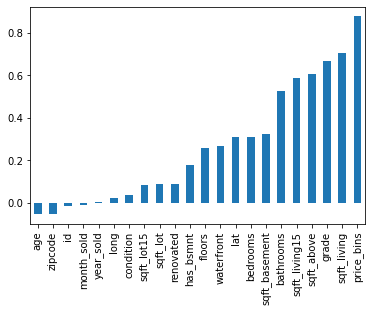

In [50]:
data.corr()['price'].sort_values().drop('price').plot(kind='bar')

In [51]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price_bins', 'geometry', 'month_sold', 'year_sold',
       'age', 'renovated', 'has_bsmnt'],
      dtype='object')

In [52]:
data.drop(columns = ['id', 'price_bins', 'view', 'lat', 'long', 'zipcode', 'age', 'year_sold', 'month_sold', 'condition', 'geometry'], inplace=True)
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'renovated', 'has_bsmnt'],
      dtype='object')

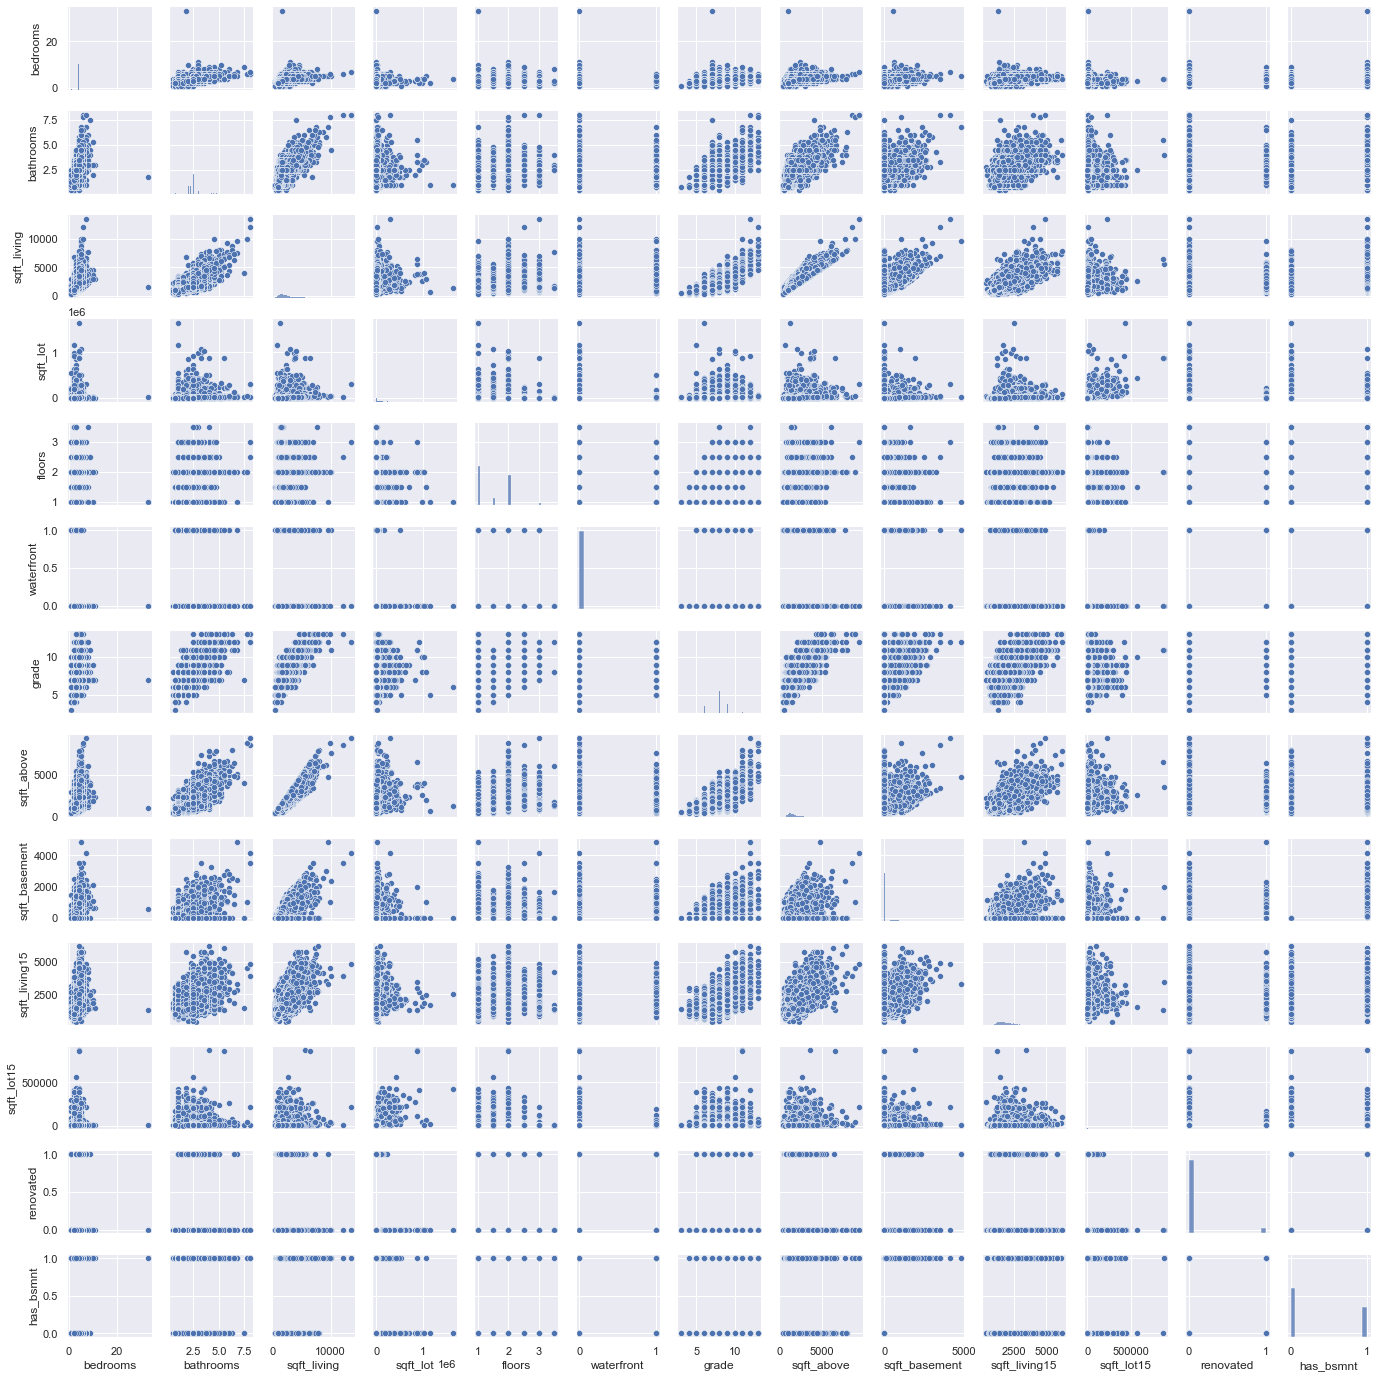

In [54]:
#scatter matrix for data, took out price(target).
sns.set()
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'renovated', 'has_bsmnt']
sns.pairplot(data[cols], height = 1.5)
plt.show()

In [56]:
# df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df.head()

,level_0,level_1,0
0,price,price,1.0
15,bedrooms,bedrooms,1.0
180,renovated,renovated,1.0
165,sqft_lot15,sqft_lot15,1.0
150,sqft_living15,sqft_living15,1.0


In [57]:
#zip the variable name columns(which were only named level_0 and level_1 by default) in a new column named "pairs".
df['pairs'] = list(zip(df.level_0, df.level_1))

#set index to pairs
df.set_index(['pairs'], inplace=True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace=True)

#rename correlation column 'cc' instead of 0
df.columns = ['cc']

#drop duplicates
df.drop_duplicates(inplace=True)

#list the paris with a high correlation, idicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(has_bsmnt, sqft_basement)",0.820893
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


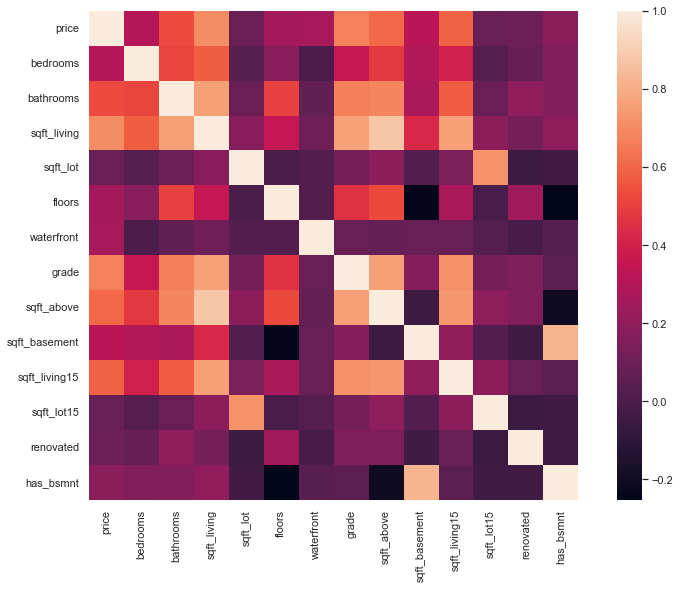

In [58]:
corrmat = data_pred.corr()
f, ax = plt.subplots(figsize = (14, 9))
sns.heatmap(corrmat, vmax = 1, square=True);

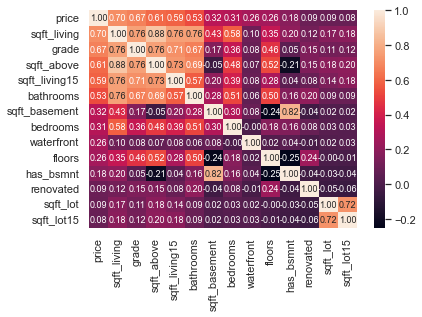

In [61]:
# price correlation matrix
k = 14 # number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data_pred[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':9}, yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

### First Regression Model - statsmodels only

#### No changes have been made to the features

In [64]:
data.shape

(21597, 14)

In [65]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'renovated', 'has_bsmnt'],
      dtype='object')

In [66]:
#statsmodels regression model with unchanged predictors from scatter matrix
outcome1 = 'price'
x_cols1 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'renovated']
predictors1 = '+'.join(x_cols1)
formula1 = outcome1 + '~' + predictors1
model = ols(formula=formula1, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     2549.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:52:26   Log-Likelihood:            -2.9786e+05
No. Observations:               21597   AIC:                         5.957e+05
Df Residuals:                   21584   BIC:                         5.959e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.127e+05   1.47e+04    -34.925      0.000   -5.41e+05   -4.84e+05
bedrooms      -3.626e+04   2213.492    -16.381      0.000   -4.06e+04   -3.19e+04
bathrooms     -2.109e+04   3596.373     -5.864      0.000   -2.81e+04    -1.4e+04
sqft_living     209.7028     21.150      9.915      0.000     168.247     251.159
sqft_lot          0.0623      0.056      1.111      0.267      -0.048       0.172
floors        -1.344e+04   4086.144     -3.289      0.001   -2.15e+04   -5431.894
waterfront     8.192e+05   1.98e+04     41.320      0.000     7.8e+05    8.58e+05
grade          1.033e+05   2431.588     42.502      0.000    9.86e+04    1.08e+05
sqft_above      -21.7656     21.143     -1.029      0.303     -63.207      19.676
sqft_basement    43.3597     21.025      2.062      0.039       2.148      84.571
sqft_living15    20.9108      3.898      5.364      0.000      13.270      28.552
sqft_lot15       -0.7543      0.086     -8.800      0.000      -0.922      -0.586
renovated      6329.5659   6520.109      0.971      0.332   -6450.330    1.91e+04
==============================================================================
Omnibus:                    15343.293   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819508.816
Skew:                           2.846   Prob(JB):                         0.00
Kurtosis:                      32.636   Cond. No.                     6.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
data.drop(columns=['sqft_basement'], inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_living15,sqft_lot15,renovated,has_bsmnt
0,221900.0,3,1.00,1180,5650,1.0,0,7,1180,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,7,2170,1690,7639,0,1
2,180000.0,2,1.00,770,10000,1.0,0,6,770,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,7,1050,1360,5000,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,8,1680,1800,7503,0,0


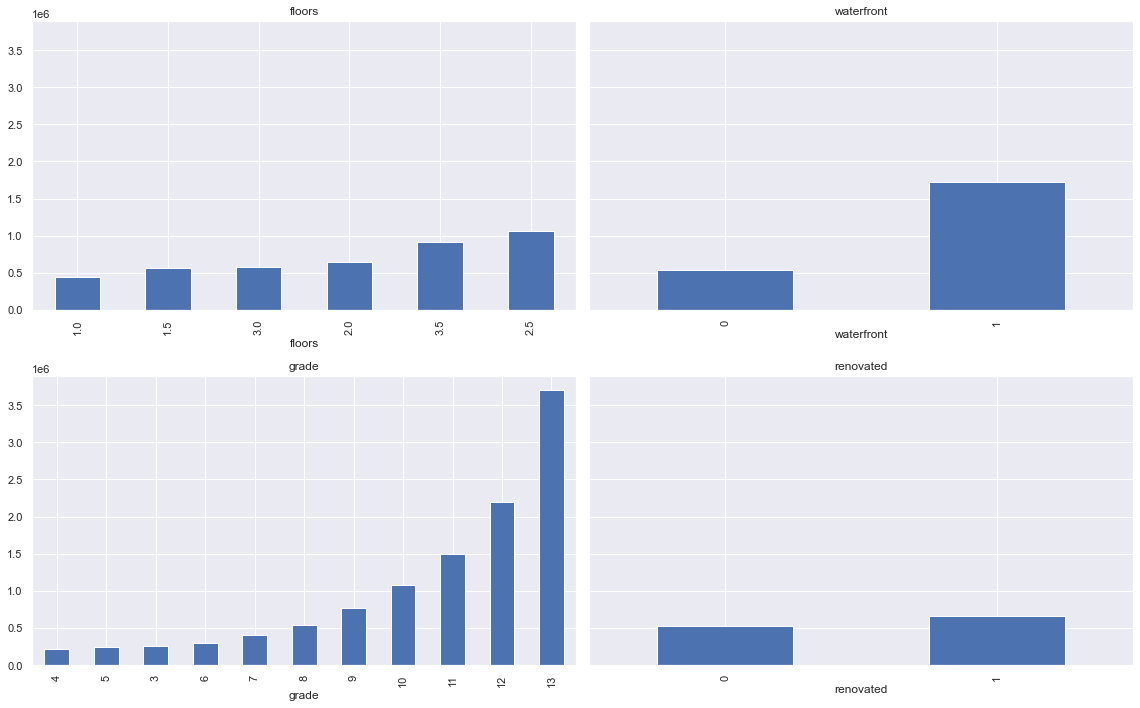

In [69]:
# create bar plots of categoricals
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharey=True)
categoricals = ['floors', 'waterfront', 'grade', 'renovated']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();

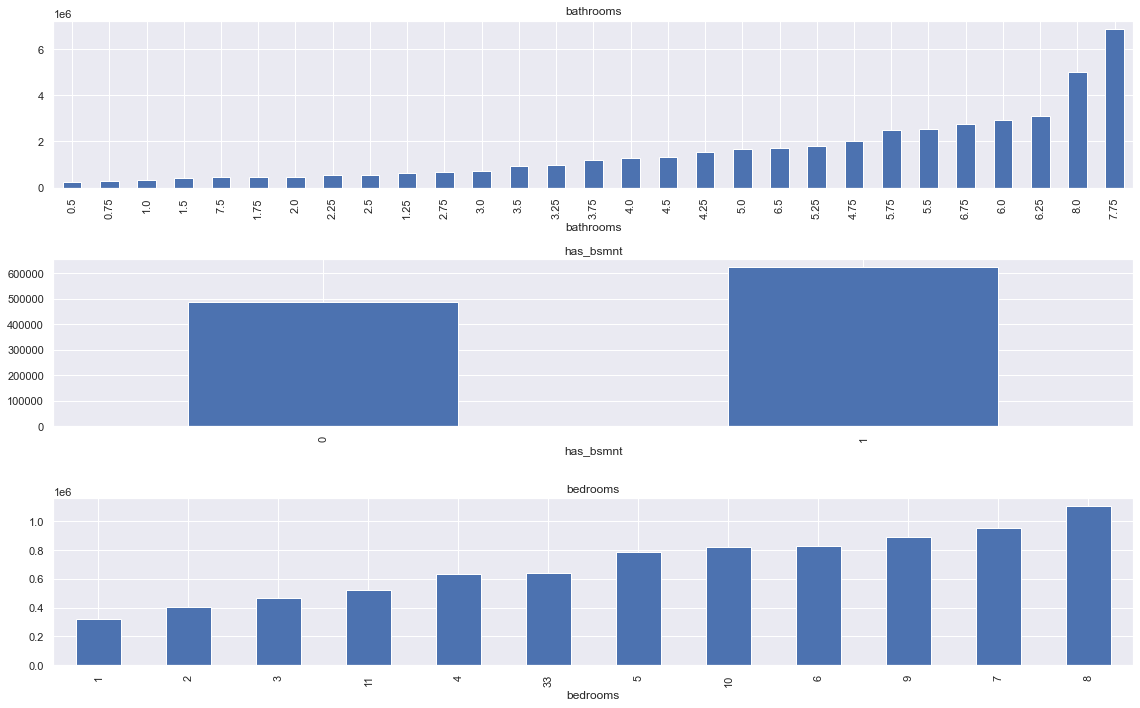

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,10))
categoricals = ['bathrooms','has_bsmnt', 'bedrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();

In [146]:
#change values in floors columns to prepare for one hot encoding
def floor(value):
    if value == 1:
        return 1
    elif value == 1.5:
        return '1and_half'
    elif value == 2:
        return 2
    elif value == 2.5:
        return '2and_half'
    elif value == 3:
        return 3
    elif value == 3.5:
        return '3and_half'
       
data.floors = data.floors.apply(floor)

#dealing with the bathrooms predictor
#change values in bathrooms column to prepare for one hot encoding
def baths(value):
    if value == 1:
        return 1
    elif value < 2:
        return '1and_quart_plus'
    elif value == 2:
        return 2
    elif value < 3:
        return '2and_quart_plus'
    elif value == 3:
        return 3
    elif value > 3:
        return '3and_quart_plus'
data.bathrooms = data.bathrooms.apply(baths)

In [71]:
#convert datatype of columns bedrooms, bathrooms, floors, and grade to prepare for 
#one hot encoding
convert_dict = {'bedrooms': str, 'bathrooms': str, 'floors': str, 'grade': str}
data = data.astype(convert_dict)

#create dummy variables for categoricals bedrooms, bathrooms, floors, condition, and grade
bedrooms_dum = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
bathrooms_dum = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)
floors_dum = pd.get_dummies(data['floors'], prefix='fl', drop_first=True)
grade_dum = pd.get_dummies(data['grade'], prefix='gr', drop_first=True)

#remove orignial columns of dummy variables, add dummy columns
data = data.drop(['bedrooms', 'bathrooms', 'floors', 'grade'], axis=1)
data = pd.concat([data, bedrooms_dum, bathrooms_dum, floors_dum, grade_dum], axis=1)
data.head()

,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,renovated,has_bsmnt,bed_10,...,gr_11,gr_12,gr_13,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9
0,221900.0,1180,5650,0,1180,1340,5650,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,0,2170,1690,7639,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,0,770,2720,8062,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,1960,5000,0,1050,1360,5000,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,1680,8080,0,1680,1800,7503,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
#recheck collinearity as have changed features
#df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402


In [149]:
# dropping sqft_above and sqft_living15 for collinearity with sqft_living
data.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [150]:
data.shape

(21597, 38)

## Second regression model - statsmodels and sklearn
### Binary categoricals have their columns, categoricals have been dummied, dropped sqft_above and sqft_living15 for collinearity

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [153]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = data.price
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 17277 rows and 37 columns
y_train is a Series with 17277 values
The training mean squared error:  47914138953.608315
The test mean squared error:  48508667469.27515
The training RSME:  218892.98516308903
The test RSME:  220246.83305163583


In [154]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     854.8
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:02:48   Log-Likelihood:            -2.3696e+05
No. Observations:               17277   AIC:                         4.740e+05
Df Residuals:                   17239   BIC:                         4.743e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.713e+05   2.16e+04     26.460      0.000    5.29e+05    6.14e+05
sqft_living            168.4976      3.908     43.115      0.000     160.837     176.158
sqft_lot                -0.0371      0.056     -0.661      0.508      -0.147       0.073
waterfront            7.349e+05      2e+04     36.761      0.000    6.96e+05    7.74e+05
sqft_lot15              -0.6358      0.087     -7.291      0.000      -0.807      -0.465
renovated             2.105e+04   6812.234      3.090      0.002    7700.144    3.44e+04
has_bsmnt             5.776e+04   4016.277     14.382      0.000    4.99e+04    6.56e+04
bed_10               -8.571e+04   1.28e+05     -0.669      0.503   -3.37e+05    1.65e+05
bed_11               -1.646e+05    2.2e+05     -0.748      0.455   -5.96e+05    2.67e+05
bed_2                -7118.0589   1.81e+04     -0.394      0.694   -4.26e+04    2.83e+04
bed_3                -6.213e+04    1.8e+04     -3.445      0.001   -9.75e+04   -2.68e+04
bed_33                 1.55e+05    2.2e+05      0.705      0.481   -2.76e+05    5.86e+05
bed_4                -8.867e+04   1.84e+04     -4.808      0.000   -1.25e+05   -5.25e+04
bed_5                -8.985e+04   1.95e+04     -4.607      0.000   -1.28e+05   -5.16e+04
bed_6                -7.613e+04   2.41e+04     -3.164      0.002   -1.23e+05    -2.9e+04
bed_7                -1.941e+05   4.74e+04     -4.099      0.000   -2.87e+05   -1.01e+05
bed_8                 1.755e+05   6.94e+04      2.530      0.011    3.95e+04    3.12e+05
bed_9                -1.804e+05   1.12e+05     -1.617      0.106   -3.99e+05    3.83e+04
bath_1and_quart_plus -3.234e+04   6088.727     -5.311      0.000   -4.43e+04   -2.04e+04
bath_2               -2.656e+04   7479.075     -3.551      0.000   -4.12e+04   -1.19e+04
bath_2and_quart_plus -7.078e+04   7194.231     -9.839      0.000   -8.49e+04   -5.67e+04
bath_3               -3.623e+04   1.16e+04     -3.112      0.002    -5.9e+04   -1.34e+04
bath_3and_quart_plus  1.891e+04   1.08e+04      1.754      0.079   -2223.689       4e+04
fl_1and_half          9.339e+04   6169.538     15.137      0.000    8.13e+04    1.05e+05
fl_2                 -2.888e+04   5116.601     -5.644      0.000   -3.89e+04   -1.88e+04
fl_2and_half           1.83e+05   1.99e+04      9.198      0.000    1.44e+05    2.22e+05
fl_3                  4.434e+04   1.11e+04      3.985      0.000    2.25e+04    6.62e+04
fl_3and_half          1.333e+05   9.04e+04      1.474      0.141    -4.4e+04    3.11e+05
gr_11                 2.701e+05   1.49e+04     18.109      0.000    2.41e+05    2.99e+05
gr_12                  6.52e+05   2.68e+04     24.305      0.000    5.99e+05    7.05e+05
gr_13                 2.076e+06   6.81e+04     30.498      0.000    1.94e+06    2.21e+06
gr_3                 -3.563e+05    2.2e+05     -1.618    

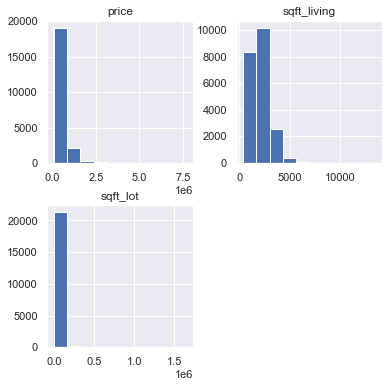

In [155]:
data[['price', 'sqft_living', 'sqft_lot']].hist(figsize=(6,6));

In [156]:
#eliminate outliers in sqft_lot
data = data[(data.sqft_lot > 1000) & (data.sqft_lot < 20000)]

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

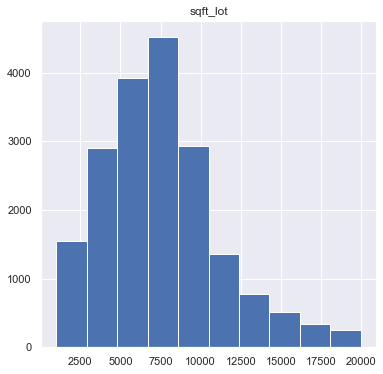

In [157]:
data[['sqft_lot']].hist(figsize=(6,6))

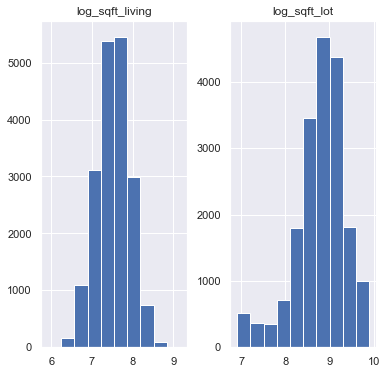

In [158]:
#log transform sqft_living and sqft_lot
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(data['sqft_living'])
data_log['log_sqft_lot'] = np.log(data['sqft_lot'])

data_log[['log_sqft_living', 'log_sqft_lot']].hist(figsize=(6,6));

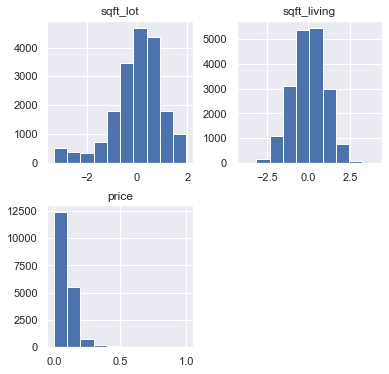

In [159]:
#scale price, sqft_lot and sqftliving_log
price = data['price']
sqft_lot = data_log['log_sqft_lot']
sqft_living = data_log['log_sqft_living']


scaled_price = (price - min(price)) / (max(price) - min(price))
scaled_sqftlot = (sqft_lot - np.mean(sqft_lot) )/ np.sqrt(np.var(sqft_lot))
scaled_sqftliving = (sqft_living - np.mean(sqft_living)) / np.sqrt(np.var(sqft_living))

#df with scaled features only
data_scaled = pd.DataFrame([])
data_scaled['sqft_lot'] = scaled_sqftlot
data_scaled['sqft_living'] = scaled_sqftliving
data_scaled['price'] = scaled_price

data_scaled.hist(figsize=(6,6));

In [160]:
#df to add log and scaled sqft_lot and sqft_living
scaled_df = data.copy()

#drop original price, sqft_lot and sqft_living
scaled_df.drop(['price', 'sqft_lot', 'sqft_living'], axis=1, inplace=True)

#concat log and scaled sqft_lot and sqft_living
scaled_df = pd.concat([scaled_df, data_scaled], axis=1)
scaled_df

,waterfront,sqft_lot15,renovated,has_bsmnt,bed_10,bed_11,bed_2,bed_3,bed_33,bed_4,...,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,sqft_lot,sqft_living,price
0,0,5650,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,-0.258494,-1.093243,0.031337
1,0,7639,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.177157,0.810479,0.100174
2,0,8062,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.743457,-2.137267,0.022213
3,0,5000,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,-0.472980,0.147785,0.114547
4,0,7503,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0.369314,-0.229223,0.094077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1509,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,-3.081421,-0.457961,0.061411
21593,0,7200,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,-0.208581,0.549623,0.070122
21594,0,2007,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,-2.770791,-1.449612,0.070579
21595,0,1287,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,-1.769854,-0.348550,0.070122


## Third regression model - statsmodels & sklearn
### price min/max scaled, log transform & normalize sqft_living & sqft_lot

In [161]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = scaled_df.price
X = scaled_df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 15260 rows and 37 columns
y_train is a Series with 15260 values
The training mean squared error:  0.0019929317021162006
The test mean squared error:  0.0020845236311636197
The training RSME:  0.04464226363118475
The test RSME:  0.04565658365628795


In [162]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     664.3
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:02   Log-Likelihood:                 25791.
No. Observations:               15260   AIC:                        -5.151e+04
Df Residuals:                   15224   BIC:                        -5.124e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2128      0.005     44.703      0.000       0.203       0.222
waterfront               0.1529      0.005     28.519      0.000       0.142       0.163
sqft_lot15           -1.689e-07   1.05e-07     -1.604      0.109   -3.75e-07    3.75e-08
renovated                0.0003      0.001      0.180      0.857      -0.003       0.003
has_bsmnt                0.0111      0.001     11.660      0.000       0.009       0.013
bed_10                  -0.0040      0.032     -0.126      0.900      -0.067       0.059
bed_11               -4.107e-13   2.49e-13     -1.646      0.100      -9e-13    7.83e-14
bed_2                   -0.0057      0.004     -1.373      0.170      -0.014       0.002
bed_3                   -0.0197      0.004     -4.718      0.000      -0.028      -0.012
bed_33                 9.55e-13    5.8e-13      1.647      0.100   -1.81e-13    2.09e-12
bed_4                   -0.0234      0.004     -5.432      0.000      -0.032      -0.015
bed_5                   -0.0188      0.005     -4.142      0.000      -0.028      -0.010
bed_6                   -0.0163      0.005     -2.971      0.003      -0.027      -0.006
bed_7                   -0.0066      0.010     -0.665      0.506      -0.026       0.013
bed_8                    0.0369      0.015      2.463      0.014       0.008       0.066
bed_9                   -0.0834      0.032     -2.603      0.009      -0.146      -0.021
bath_1and_quart_plus    -0.0084      0.001     -6.336      0.000      -0.011      -0.006
bath_2                  -0.0074      0.002     -4.597      0.000      -0.011      -0.004
bath_2and_quart_plus    -0.0155      0.002     -9.617      0.000      -0.019      -0.012
bath_3                  -0.0051      0.003     -2.003      0.045      -0.010      -0.000
bath_3and_quart_plus     0.0115      0.002      4.837      0.000       0.007       0.016
fl_1and_half             0.0189      0.001     13.379      0.000       0.016       0.022
fl_2                    -0.0103      0.001     -8.054      0.000      -0.013      -0.008
fl_2and_half             0.0332      0.005      7.258      0.000       0.024       0.042
fl_3                    -0.0026      0.003     -0.921      0.357      -0.008       0.003
fl_3and_half             0.0267      0.019      1.439      0.150      -0.010       0.063
gr_11                    0.0615      0.004     16.833      0.000       0.054       0.069
gr_12                    0.1873      0.009     19.972      0.000       0.169       0.206
gr_13                    0.2279      0.022     10.137      0.000       0.184       0.272
gr_3                    -0.0812      0.045     -1.804      0.071      -0.169       0.007
gr_4                    -0.1058      0.011     -9.255      0.000      -0.128      -0.083
gr_5                    -0.1253      0.004    -28.211    

## Fifth regression model - statsmodels and sklearn
### eliminate gr_9 & gr_11 for continued & increased high p-values and confidence levels spanning 0 from 4th regression

In [164]:
drop_gr = scaled_df.copy()
drop_gr.drop(['gr_9', 'gr_11'], axis=1, inplace=True)

In [165]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = drop_gr.price
X = drop_gr.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 15260 rows and 35 columns
y_train is a Series with 15260 values
The training mean squared error:  0.002194637378002558
The test mean squared error:  0.0021398640775361208
The training RSME:  0.04684695697697512
The test RSME:  0.04625866489141381


In [166]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     591.9
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:13:34   Log-Likelihood:                 25056.
No. Observations:               15260   AIC:                        -5.004e+04
Df Residuals:                   15224   BIC:                        -4.976e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1869      0.005     40.535      0.000       0.178       0.196
waterfront               0.1773      0.006     31.319      0.000       0.166       0.188
sqft_lot15           -4.911e-08    1.2e-07     -0.410      0.682   -2.84e-07    1.86e-07
renovated               -0.0033      0.002     -2.118      0.034      -0.006      -0.000
has_bsmnt                0.0096      0.001      9.661      0.000       0.008       0.012
bed_10                  -0.0303      0.027     -1.101      0.271      -0.084       0.024
bed_11                  -0.0470      0.047     -0.997      0.319      -0.139       0.045
bed_2                   -0.0113      0.004     -2.660      0.008      -0.020      -0.003
bed_3                   -0.0284      0.004     -6.644      0.000      -0.037      -0.020
bed_33                   0.0182      0.047      0.387      0.699      -0.074       0.111
bed_4                   -0.0329      0.004     -7.487      0.000      -0.042      -0.024
bed_5                   -0.0328      0.005     -7.064      0.000      -0.042      -0.024
bed_6                   -0.0350      0.006     -6.229      0.000      -0.046      -0.024
bed_7                   -0.0147      0.011     -1.379      0.168      -0.035       0.006
bed_8                    0.0068      0.015      0.450      0.653      -0.023       0.036
bed_9                   -0.0307      0.020     -1.549      0.121      -0.069       0.008
bath_1and_quart_plus    -0.0102      0.001     -7.343      0.000      -0.013      -0.007
bath_2                  -0.0109      0.002     -6.340      0.000      -0.014      -0.008
bath_2and_quart_plus    -0.0213      0.002    -12.623      0.000      -0.025      -0.018
bath_3                  -0.0093      0.003     -3.500      0.000      -0.015      -0.004
bath_3and_quart_plus     0.0214      0.002      8.654      0.000       0.017       0.026
fl_1and_half             0.0193      0.001     13.005      0.000       0.016       0.022
fl_2                    -0.0080      0.001     -6.005      0.000      -0.011      -0.005
fl_2and_half             0.0393      0.005      8.235      0.000       0.030       0.049
fl_3                     0.0035      0.003      1.187      0.235      -0.002       0.009
fl_3and_half             0.0473      0.021      2.217      0.027       0.005       0.089
gr_12                    0.1972      0.010     20.617      0.000       0.178       0.216
gr_13                    0.2603      0.021     12.322      0.000       0.219       0.302
gr_3                    -0.0396      0.047     -0.839      0.402      -0.132       0.053
gr_4                    -0.0585      0.013     -4.368      0.000      -0.085      -0.032
gr_5                    -0.0855      0.004    -19.972      0.000      -0.094      -0.077
gr_6                    -0.0827      0.002    -38.426    